In [1]:
import pandas as pd
import numpy as np
import urllib.request
import os

In [2]:
%matplotlib inline

In [3]:
# Download the file from `url` and save it locally under `gtfs.zip`, then extract:
def gtfs_downloader(url):
    file_name = 'gtfs.zip'
    urllib.request.urlretrieve(url, file_name)
    import zipfile
    with zipfile.ZipFile(file_name,"r") as zip_ref:
        zip_ref.extractall("gtfs/")

In [4]:
#Give the URL of the TransitFeeds gtfs you want to analyze and create dataframes.
url = 'https://www.arcgis.com/sharing/rest/content/items/885399f83408473c8d815e40c5e702b7/data'
if (not os.path.isdir('./gtfs')):
    gtfs_downloader(url)

In [5]:
trips = pd.read_csv('gtfs/trips.txt')

In [6]:
trips.head()

,route_id,service_id,trip_id,trip_headsign,trip_short_name,direction_id,block_id,shape_id,wheelchair_accessible
0,8__151___,201_8__151___,201_8__151___-8__151____1_05:30:00_2_s.__1_8__...,INTERCAMBIADOR DE PLAZA CASTILLA,Sale/llega a superficie,1,NaN,8__151____2_s._IT_2,0
1,8__151___,201_8__151___,201_8__151___-8__151____1_06:00:00_1_s.__1_8__...,AV.ESPAÑA-EST.ALCOBENDAS-S.S.REYES,151 ALCOBENDAS,0,NaN,8__151____1_s._IT_2,0
2,8__151___,201_8__151___,201_8__151___-8__151____1_06:30:00_2_-__4_8__1...,INTERCAMBIADOR DE PLAZA CASTILLA,151 MADRID (Pza. Castilla),1,NaN,8__151____2_-_IT_1,0
3,8__151___,201_8__151___,201_8__151___-8__151____1_07:20:00_1_-__5_8__1...,AV.ESPAÑA-EST.ALCOBENDAS-S.S.REYES,151 ALCOBENDAS,0,NaN,8__151____1_-_IT_1,0
4,8__151___,201_8__151___,201_8__151___-8__151____1_07:50:00_2_-__8_8__1...,INTERCAMBIADOR DE PLAZA CASTILLA,151 MADRID (Pza. Castilla),1,NaN,8__151____2_-_IT_1,0


In [7]:
import partridge as ptg

inpath = 'gtfs'

service_ids = ptg.read_busiest_date(inpath)[1]
view = {'trips.txt': {'service_id': service_ids}}

feed = ptg.load_geo_feed(inpath, view)

feed.shapes.head()

/opt/conda/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


,shape_id,geometry
0,8_N_101____1_-_IT_1,"LINESTRING (-3.68892 40.46804, -3.68888 40.468..."
1,8_N_101____2_-_IT_1,"LINESTRING (-3.64021 40.53059, -3.63992 40.530..."
2,8_N_102____1_-_IT_1,"LINESTRING (-3.68900 40.46776, -3.68888 40.468..."
3,8_N_102____2_-_IT_1,"LINESTRING (-3.61815 40.54068, -3.61756 40.541..."
4,8_N_103____1_-_IT_1,"LINESTRING (-3.68907 40.46751, -3.68900 40.467..."


In [8]:
feed.stops.head()

,stop_id,stop_code,stop_name,stop_desc,zone_id,stop_url,location_type,parent_station,stop_timezone,wheelchair_boarding,geometry
0,par_8_06686,06686,AV.BURGOS-C.C.SANCHINARRO,Avda de Burgos 133,A,http://www.crtm.es,0,NaN,Europe/Madrid,2,POINT (-3.66300 40.49805)
1,par_8_06687,06687,AV.BURGOS-DOMINICOS,Avda de Burgos 11300,A,http://www.crtm.es,0,NaN,Europe/Madrid,2,POINT (-3.65995 40.50144)
2,par_8_06689,06689,CTRA.A1-CUESTA BLANCA,Ctra de Irún 13700,B1,http://www.crtm.es,0,NaN,Europe/Madrid,2,POINT (-3.65101 40.52177)
3,par_8_06690,06690,CTRA.IRÚN-CONCESIONARIO,Ctra de Irún 14700,B1,http://www.crtm.es,0,NaN,Europe/Madrid,2,POINT (-3.64186 40.53379)
4,par_8_06691,06691,AV.OLÍMPICA-C.C.LA VEGA,Avda Olímpica 9,B1,http://www.crtm.es,0,NaN,Europe/Madrid,2,POINT (-3.63698 40.53525)


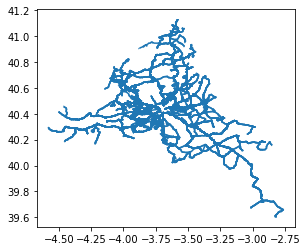

In [9]:
feed.shapes.plot()

In [10]:
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

In [11]:
# Function for displaying the map
def embed_map(m, file_name):
    from IPython.display import IFrame
    m.save(file_name)
    return IFrame(file_name, width='100%', height='500px')

In [12]:
import os
import json
import requests
from ipyleaflet import Map, GeoJSON, Choropleth, Marker, MarkerCluster, Popup
from ipywidgets import HTML

In [13]:
file_path = 'm8_postes.json'

if not os.path.exists(file_path):
  #url = 'https://opendata.arcgis.com/datasets/19884a02ac044270b91fa478d80f7858_1.geojson'
  url = 'https://opendata.arcgis.com/datasets/19884a02ac044270b91fa478d80f7858_2.geojson'
  r = requests.get(url)
  with open(file_path, 'w') as f:
    f.write(r.content.decode("utf-8"))

with open(file_path, 'r') as f:
  data = json.load(f)

In [14]:
# Create a map
m = Map(center=(40.416775, -3.703790), zoom=10)

#geo_json = MarkerCluster(GeoJSON(data=data, style = {'color': 'green', 'opacity':1, 'weight':1.9, 'dashArray':'9', 'fillOpacity':0.1}))
#m.add_layer(geo_json)

markers = [Marker(
            location=(poste['geometry']['coordinates'][1], poste['geometry']['coordinates'][0]),
            title=poste['properties']['CODIGOESTACION'],
            draggable=False,
            popup = HTML(description = "Stop:", value = poste['properties']['CODIGOESTACION'])
            ) for poste in data['features']]


marker_cluster = MarkerCluster(
    markers = markers
)

m.add_layer(marker_cluster)

# Display the map (if you dare)
#m